# Historical Data: Intraday

These financial data are generally provided in a format that includes the following information:  
Date  
Open Price  
High Price  
Low Price  
Closing Price  
Volume
These data—often referred to as OHLC Chart Data—can be interpreted as Time Series data and are perfect for performing technical analysis. We’ll dive into this format in just a moment but, for now, just realize this is a standard format for historical pricing data within financial markets.

## [yfinance]()

For this approach, we need to install the yfinance library as `pip install yfinance `. This library provides sample tools for working with financial data requests to the Yahoo Finance website.  
> ⚠️ periodic breakage, general quirkiness

In [152]:
import yfinance as yf
import pandas as pd
yfinance_aapl = yf.download('AAPL', period='23y', auto_adjust=True)
yfinance_aapl = yfinance_aapl.reset_index().iloc[31:]
yfinance_aapl = yfinance_aapl.iloc[::-1].reset_index(drop=True)

[*********************100%***********************]  1 of 1 completed


# Alpha Vantage:
 ✌️ Providing Free 20 years of data with no missing values.  
 ⚠️ period breakage

In [115]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=UNO4CZQHSBZSN71N'
r = requests.get(url)
alpha_vantage_aapl = r.json()
timeseries = alpha_vantage_aapl['Time Series (Daily)']
df_dict = dict()
value_list = list()
index = ['Open', 'High', 'Low', 'Close', 'Volume']
for key in timeseries:
    for key1 in timeseries.get(key):
        value_list.append(timeseries[key][key1])
    df_dict[key]=value_list
    value_list = list()

alpha_vantage_aapl_df = pd.DataFrame(df_dict, index=index).T
alpha_vantage_aapl_df = alpha_vantage_aapl_df.reset_index().rename(columns={'index':'Date'})
alpha_vantage_aapl_df[['Open', 'High', 'Low', 'Close']] = alpha_vantage_aapl_df[['Open', 'High', 'Low', 'Close']].astype(float)
alpha_vantage_aapl_df['Date'] = pd.to_datetime(alpha_vantage_aapl_df['Date'])
alpha_vantage_aapl_df['Volume'] = alpha_vantage_aapl_df['Volume'].astype('int64')


#### Comparison of two datasets:
Below is the comparison of values in two different data sets provided by Y finance and Alpha Vantage of company AAPL. 

In [154]:
alpha_vantage_aapl_df.compare(yfinance_aapl)

Open                High                   Low               Close  \
         self       other    self       other      self       other    self   
0     151.210  151.210007  151.35  151.350006  148.3700  148.369995  150.70   
1     154.650  154.649994  155.24  155.240005  151.3800  151.380005  152.37   
2     154.785  154.789993  157.10  157.100006  153.6106  153.610001  155.31   
3     159.900  159.899994  160.54  160.539993  153.3700  153.369995  153.84   
4     159.590  159.589996  164.26  164.259995  159.3000  159.300003  163.43   
...       ...         ...     ...         ...       ...         ...     ...   
5752   84.620    0.645138   88.37    0.673727   84.0000    0.640374   88.31   
5753   82.060    0.625604   85.37    0.650857   80.6200    0.614645   83.62   
5754   81.620    0.622269   83.25    0.634657   81.0000    0.617503   81.50   
5755   78.000    0.594633   81.69    0.622745   77.3100    0.589392   80.25   
5756   80.000    0.609880   80.69    0.615121   77.3700    0.589868   77.62   

                       Volume               
           other         self        other  
0     150.699997  162278841.0  162157000.0  
1     152.369995   90481110.0   90481100.0  
2     155.309998   87965409.0   87965400.0  
3     153.839996  122656614.0  122656600.0  
4     163.429993  104955962.0  104956000.0  
...          ...          ...          ...  
5752    0.673250    3721500.0  416808000.0  
5753    0.637516    3384700.0  379086400.0  
5754    0.621316    2932700.0  328462400.0  
5755    0.611786    3564600.0  399235200.0  
5756    0.591774    2487300.0  278577600.0  

[5757 rows x 10 columns]

In [155]:
difference_in_values_in_two_df = yfinance_aapl - alpha_vantage_aapl_df
difference_in_values_in_two_df

,Date,Open,High,Low,Close,Volume
0,0 days,0.000007,0.000006,-0.000005,-0.000003,-121841
1,0 days,-0.000006,0.000005,0.000005,-0.000005,-10
2,0 days,0.004993,0.000006,-0.000599,-0.000002,-9
3,0 days,-0.000006,-0.000007,-0.000005,-0.000004,-14
4,0 days,-0.000004,-0.000005,0.000003,-0.000007,38
...,...,...,...,...,...,...
5752,0 days,-83.974862,-87.696273,-83.359626,-87.636750,413086500
5753,0 days,-81.434396,-84.719143,-80.005355,-82.982484,375701700
5754,0 days,-80.997731,-82.615343,-80.382497,-80.878684,325529700
5755,0 days,-77.405367,-81.067255,-76.720608,-79.638214,395670600


The difference_in_values_in_df indicates that the data provided by alpha vantage ghas slight more higher values than data provided by y finance.

#### Representation
These graphs will give the difference in values of two different datasets of same company provided by Y finance and Alpha Vantage.

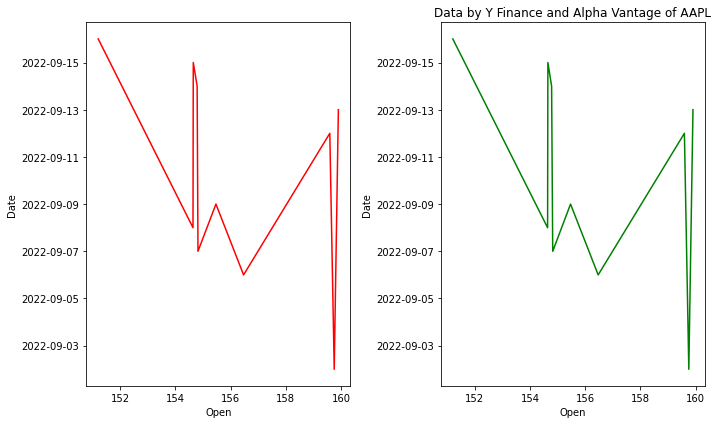

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 6.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
plt.title('Data by Y Finance and Alpha Vantage of AAPL', loc='center')
sns.lineplot(x='Open', y='Date', data=yfinance_aapl.head(10), color="red", ax=axes[0], palette='hot', markers='o')
sns.lineplot(x="Open", y='Date', data=alpha_vantage_aapl_df.head(10), color="green", ax=axes[1],palette='hot',markers='o')
plt.show()

The graph's are almost same. Hence, there are minor differences in the values of the two datasets.

## Zerodha-historical-data-download :
This contains code to download historical data for more than 2000 days and intraday data for more than 100 days.  
⚠️ Not provinding free historical data


In [ ]:
from kiteconnect import KiteConnect, KiteTicker
import pandas as pd
import datetime as dt
import numpy as np
import os
import time
import json



api_key = 'your_api_key'
api_secret = 'your_api_secret'

kite = KiteConnect(api_key)
url = kite.login_url()

request_token = 'your_request_token'
session = kite.generate_session(request_token, api_secret)
access_token = session['access_token']
kite.set_access_token(access_token)

instruments = pd.DataFrame(kite.instruments('NSE'))


def lookup(df, symbol):
    try:
        return df[df.tradingsymbol==symbol].instrument_token.values[0]
    except:
        return -1

def fetchandstoreOHLC(symbol,duration,tf):
    nodata=[]
    try:
        if not os.path.isfile(symbol+'.csv'):
            data = pd.DataFrame()
            instrument_token = lookup(instruments, symbol)  
            if duration>100:
                no_of_hundreds = duration//100
                start = 100
                end = 0
                for i in range(no_of_hundreds):
                    df = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(start), 
                    to_date = dt.datetime.today()-dt.timedelta(end), interval = tf))
                    data = data.append(df)
                    start+=100
                    end+=100
                dur1 = duration%100
                df1 = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(duration), 
                                      to_date = dt.datetime.today()-dt.timedelta(duration-dur1), interval = tf))
                data = data.append(df1)
            else:
                df2 = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(duration), 
                                      to_date = dt.datetime.today(), interval = tf))
                data = data.append(df2)
            data.set_index("date", inplace = True)
            data.sort_index(ascending= True,inplace = True)
            print('Storing {} days data for {}'.format(duration, symbol))
            data.to_csv(symbol+'.csv')
        else:
            print('Data already available for{}'.format(symbol))
            return
    except:
        print("skipping for {}".format(symbol))
        nodata.append(symbol)
    
tickers = ['HDFCBANK','ICICIBANK','KOTAKBANK', 'AXISBANK', 'SBIN', 'RELIANCE','TCS','INFY','HINDUNILVR','HDFC','BAJFINANCE','WIPRO','BHARTIARTL','HCLTECH','ASIANPAINT','ITC','LT','ULTRACEMCO',
           'MARUTI','SUNPHARMA','TATASTEEL','JSWSTEEL','TITAN','ADANIPORTS','ONGC','HDFCLIFE','TECHM','DIVISLAB','POWERGRID','SBILIFE','NTPC','BAJAJ-AUTO','BPCL','IOC','M&M','SHREECEM','HINDALCO',
           'GRASIM','BRITANNIA','TATAMOTORS','COALINDIA','TATACONSUM','INDUSINDBK','DRREDDY','CIPLA','EICHERMOT','UPL','NESTLEIND','HEROMOTOCO','NIFTY 50','NIFTY BANK']


for ticker in tickers:
    fetchandstoreOHLC(ticker, 1095, '5minute')


### [Angel One]():
SMARTAPI-PYTHON is a Python library for dealing AMX,that is a set of REST-like HTTP APIs that expose many capabilities required to build stock market investment and trading platform.
API is as below:  
https://apiconnect.angelbroking.com/rest/secure/angelbroking/historical/v1/getCandleData
 
> NOTE:  Historical API only available for NSE Equity(NSE) and NSE Futures (NFO) Segment  


In [ ]:
from smartapi.smartConnect import SmartConnect
import pandas as pd
import requests
feed_token = None
token_map = None

obj = SmartConnect(api_key="TkDi9GY2")
data = obj.generateSession("R12345", "Tannu@123")
print(data)
refreshToken=data['data']['refreshToken']

#fetch the feedtoken
feedToken = obj.getfeedToken()
feed_token = feedToken
#fetch User Profile
userProfile = obj.getProfile((refreshToken))
print(userProfile)

#historic api
def OHLCHistory(symbol, token, interval, fdate, todate):
    try:
        historicParam={
            "exchange":"NSE",
            "tradingsymbol":symbol,
            "symboltoken":token,
            "interval":interval,
            "fromdate":fdate,
            "todate":todate
        }
        history = obj.getCandleData(historicParam)['data']
        history = pd.DataFrame(history)

        history = history.rename(
            columns={0: "DateTime", 1: "open", 2: "high", 3: "low", 4: "close", 5:"Volumne"}
        )
        history['DateTime']=pd.to_datetime(history['DataTime'])
        history=history.set_index('DateTime')
        return history
    except Exception as e:
        print("Histpric api failed: {}".format(e))
data = OHLCHistory("SBIN-EQ", "3045", "ONE_DAY", "2020-02-08 00:00", "2021-02-08 15:30")
data_df = pd.DataFrame(data)
data_df.to_csv(r'{}.csv'.format("SBIN_EQ"), index=True, header=False)

### [Polygio.io](https://github.com/polygon-io/client-python/tree/master/examples)

#### Parameters
|Parameter|Default value|Explanation|
|---|---|---|
|multiplier |1 |The size of the timespan multiplier.|
|timespan|day|The size of the time window.|
|limit|120|Limits the number of base aggregates queried to create the aggregate results. Max 50000 and Default 5000.|  
  
  
>Note: Providing 2 years of data at free cost with no mising values 

In [189]:
from polygon import RESTClient
from typing import cast
from urllib3 import HTTPResponse
import json

client = RESTClient('8ZVJZANj1dxaywxE6Gk09p13HF4poSsy')

aggs = cast(
    HTTPResponse,
    client.get_aggs(
        "AAPL",
        1,
        "day",
        "1999-04-01",
        "2022-04-04",
        raw=True,
    ),
)

resp = aggs.data.decode()
result = json.loads(resp)
data = result['results']
#print(data)
length = len(data)
value2 = dict()
extra = list()
index = ['Volume', 'vwap', 'Open', 'Close', 'High', 'Low', 't', 'transactions']
for i in range(length):
    for key in data[i]:
       extra.append(data[i][key])
    value2[i]=extra
    extra = list()

polygon_aapl_df = pd.DataFrame(value2, index=index).T
polygon_aapl_df['Date'] = pd.to_datetime(polygon_aapl_df['t'], unit='ms').dt.date
polygon_aapl_df = polygon_aapl_df[['Date', 'Open', 'High', 'Low' ,'Close', 'Volume']]
polygon_aapl_df

,Date,Open,High,Low,Close,Volume
0,2020-09-17,109.72,112.20,108.71,110.34,177056468.0
1,2020-09-18,110.40,110.88,106.09,106.84,287076882.0
2,2020-09-21,104.54,110.19,103.10,110.08,195547704.0
3,2020-09-22,112.68,112.86,109.16,111.81,183053939.0
4,2020-09-23,111.62,112.11,106.77,107.12,150718671.0
...,...,...,...,...,...,...
385,2022-03-29,176.69,179.01,176.34,178.96,99459940.0
386,2022-03-30,178.55,179.61,176.70,177.77,91340654.0
387,2022-03-31,177.84,178.03,174.40,174.61,103049285.0
388,2022-04-01,174.03,174.88,171.94,174.31,78251328.0


#### Graphical representation of comaprison of values of data
These are the graphical representation of the data provided by Y Finance, Alpha Vantage and Polygon.ai of same company AAPL for comparison.

In [200]:
yfinance_aapl_df = yfinance_aapl.iloc[114:504]
yfinance_aapl_df = yfinance_aapl_df.iloc[::-1].reset_index(drop=True)
alpha_vantage_aapl_df1 = alpha_vantage_aapl_df.iloc[114:504]
alpha_vantage_aapl_df1 = alpha_vantage_aapl_df1.iloc[::-1].reset_index(drop=True)

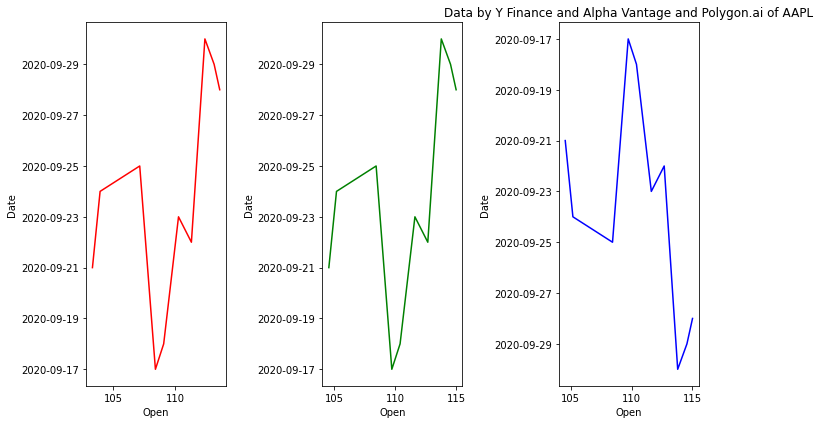

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 6.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
plt.title('Data by Y Finance and Alpha Vantage and Polygon.ai of AAPL', loc='center')
sns.lineplot(x='Open', y='Date', data=yfinance_aapl_df.head(10), color="red", ax=axes[0], palette='hot', markers='o')
sns.lineplot(x="Open", y='Date', data=alpha_vantage_aapl_df1.head(10), color="green", ax=axes[1],palette='hot',markers='o')
sns.lineplot(x="Open", y='Date', data=polygon_aapl_df.head(10), color="blue", ax=axes[2],palette='hot',markers='o')
plt.show()

There are minor difference's in the values of the three datasets provided by different datasources of a same company. But polygon.ai is providing 2 years of data at free of cost.

### [Kotak Securities]()

Error: Need a bank account in the Kotak Mahindra bank for the api id.



In [111]:
from ks_api_client import ks_api

client = ks_api.KSTradeApi(access_token = "generate and update new access token of production keys", userid = "userlogin id which is same as application owner", consumer_key="consumer key of production keys", ip = "127.0.0.1", app_id = "name of application e.g. DefaultApplication", host = "https://ctradeapi.kotaksecurities.com/apim")

#First initialize session and generate session token

try:
    # Get historical prices
    client.history("historicalprices",{"exchange":"bse","cocode":"476","fromdate":"01-jan-2014","todate":"08-oct-2015"})
except Exception as e:
    print("Exception when calling Historical API->details: %s\n" % e)

ApiException: (401)
Reason: Unauthorized
HTTP response body: {"fault":{"code":900901,"message":"Invalid Credentials","description":"Access failure for API: /apim/session/1.0, version: 1.0 status: (900901) - Invalid Credentials. Make sure you have provided the correct security credentials"}}


### [ALice Blue API]()

1. Historical data API will be available from 5:30 PM (evening) to 8 AM (Next day morning) on weekdays (Monday to Friday). Historical data will not be available during market hours.  
2. Historical data API will be available fully during weekends and holidays.  
3. For NSE segment, 2 years of historical data will be provided.  
4. For NFO, CDS and MCX segments, current expiry data will be provided.  

In [ ]:
from alice_blue import *
session_id = AliceBlue.login_and_get_sessioID(username = "username", password = "password", twoFA= "1993", app_id = "app_id", api_secret = "api_secret")
data = pd.DataFrame(alice.historical_data(alice.get_instrument_by_symbol("NSE"), datetime.datetime.now(), datetime.datetime.now(), HistoricalDataType.Minute))
data.to_csv("NSE.csv", header=False)

### Conclusion
Tested API of Y Finance, Alpha Vantage, Zerodha, Polygon.ai, Alice Blue. Following are the observations:
1. Y Finance providing highest amount of data of different companies with more api requests in a day and data has no missing values. But data has more period breakage.
2. Alpha Vantage providing 23 years of data of every company with less period breakage and no missing values. Api requests is 10 request/10 min.
3. Zerodha is not providing free histortical data.
4. Polygon.ai providing 2 years of data at free with period breakage and no missing values.
5. Alice Blue is 2 years historical data.

We can concatenate data of Y finanace and Alpha vantage to decrease period breakage.  
*pd.concat([df1, df2], axis=0)*